In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\cecil\anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-39e4d515b9f6>", line 1, in <module>
    import tensorflow as tf
  File "C:\Users\cecil\anaconda3\envs\tf1\lib\site-packages\tensorflow\__init__.py", line 99, in <module>
    from tensorflow_core import *
  File "C:\Users\cecil\anaconda3\envs\tf1\lib\site-packages\tensorflow_core\__init__.py", line 34, in <module>
    from tensorflow.python import pywrap_tensorflow  # pylint: disable=unused-import
  File "C:\Users\cecil\anaconda3\envs\tf1\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "C:\Users\cecil\anaconda3\envs\tf1\lib\site-packages\tensorflow\__init__.py", line 44, in _load
    module = _importlib.import_module(self.__name__)
  File "C:\Users\cecil\anaconda3\envs\tf1\lib\importlib\__init__.py", line 12

### 단순 선형 회귀 모델

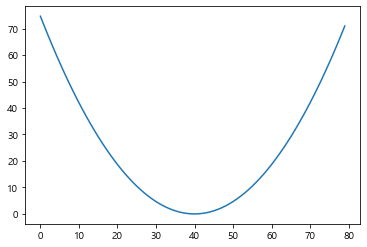

In [3]:
# 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.placeholder(tf.float32)

# 가설 준비(Wx + b)
hypot = W * x_train

# 비용함수(평균제곱함수)
cost = tf.reduce_mean(tf.square(hypot - y_train))
# ------------------- 텐서플로우의 그래프 완성 -------------------#

# 비용함수를 그래프로 그려보기(3장 p7, inear Regression cost함수 최소화)
sess = tf.Session()

cost_val = []
for i in range(-30, 50):
    result = sess.run(cost, feed_dict={W:i*0.1})
    cost_val.append(result)
    
plt.plot(cost_val)
sess.close()

### 경사 하강(Gradient descent) 알고리즘을 이용한 가중치 학습

In [ ]:
## 경사하강법 = 현재 가중치에서 알파(러닝메이트)를 빼주기

In [23]:
# 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수(평균제곱오차(MSE))
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사하강 알고리즘(Gradient Descent) 
gradient = tf.reduce_mean((hypot - y_train) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient) 
update = W.assign(descent) ## W = descent

########## Graph 작업 완료 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)
    
sess.close()

0 [-0.07892525] 15.737907
1 [0.3780249] 4.4820976
2 [0.62173164] 1.2804447
3 [0.75170857] 0.36975265
4 [0.8210296] 0.110711284
5 [0.8580008] 0.03702845
6 [0.8777188] 0.01606976
7 [0.88823503] 0.010108202
8 [0.8938437] 0.0084124645
9 [0.89683497] 0.007930113
10 [0.89843035] 0.0077929124
11 [0.8992812] 0.007753892
12 [0.899735] 0.0077427938
13 [0.899977] 0.007739634
14 [0.9001061] 0.007738733
15 [0.9001749] 0.0077384748
16 [0.90021163] 0.007738404
17 [0.90023124] 0.007738384
18 [0.9002417] 0.0077383867
19 [0.9002472] 0.0077383765
20 [0.9002502] 0.007738374


In [25]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수(평균제곱오차(MSE))
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사하강 알고리즘(Gradient Descent) 
gradient = tf.reduce_mean((hypot - y_train) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient) 
update = W.assign(descent) ## W = descent

########## Graph 작업 완료 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, weight, c = sess.run([update, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5], y_train:[1, 2, 3, 4, 5]})
    print(step, weight, c)
    
sess.close()

0 [0.7774806] 1.6618359
1 [0.7368965] 0.17947382
2 [0.74095494] 0.1646502
3 [0.740549] 0.164502
4 [0.7405896] 0.16450045
5 [0.7405856] 0.16450049
6 [0.740586] 0.16450052
7 [0.7405859] 0.16450045
8 [0.740586] 0.16450053
9 [0.7405859] 0.16450045
10 [0.740586] 0.16450053
11 [0.7405859] 0.16450045
12 [0.740586] 0.16450053
13 [0.7405859] 0.16450045
14 [0.740586] 0.16450053
15 [0.7405859] 0.16450045
16 [0.740586] 0.16450053
17 [0.7405859] 0.16450045
18 [0.740586] 0.16450053
19 [0.7405859] 0.16450045
20 [0.740586] 0.16450053


In [29]:
######### 경사하강 알고리즘 객체 사용 ##########

# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수(평균제곱오차(MSE))
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사하강 알고리즘(Gradient Descent) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

########## Graph 작업 완료 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, weight, c = sess.run([train, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5], y_train:[1, 2, 3, 4, 5]})
    print(step, weight, c)
    
sess.close()

0 [2.372611] 22.672928
1 [2.1320703] 13.340586
2 [1.9481612] 7.9012923
3 [1.8074846] 4.730685
4 [1.6998119] 2.8821583
5 [1.6173346] 1.8040829
6 [1.554092] 1.1749926
7 [1.5055338] 0.807556
8 [1.4681863] 0.5926027
9 [1.4393977] 0.4665149
10 [1.4171438] 0.39221925
11 [1.3998795] 0.3481109
12 [1.3864248] 0.32160002
13 [1.3758793] 0.30534914
14 [1.3675556] 0.29508263
15 [1.3609289] 0.28830916
16 [1.3555986] 0.28357646
17 [1.3512588] 0.28003836
18 [1.347676] 0.27720177
19 [1.3446721] 0.27477905
20 [1.342111] 0.2726028


In [35]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

# W는 1, bias는 1.1
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수(평균제곱오차(MSE))
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사하강 알고리즘(Gradient Descent) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

########## Graph 작업 완료 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, c, weight, bias = sess.run([train, cost, W, b], feed_dict={x_train:[1, 2, 3, 4, 5], y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0:
        print(step, c, weight, bias)

# 1(W) * 1 + 1.1(b)= 2.1

0 0.9014084 [1.5710166] [-1.0953137]
100 0.44473806 [1.4314986] [-0.457847]
200 0.2259124 [1.307537] [-0.01030603]
300 0.11475615 [1.2191871] [0.30866453]
400 0.058292378 [1.1562186] [0.5360008]
500 0.02961064 [1.1113399] [0.69802743]
600 0.015041241 [1.079354] [0.8135066]
700 0.0076404363 [1.056557] [0.8958111]
800 0.0038811036 [1.0403092] [0.95447063]
900 0.0019714788 [1.0287291] [0.9962785]
1000 0.0010014308 [1.0204757] [1.0260761]
1100 0.0005087006 [1.0145935] [1.0473129]
1200 0.00025840814 [1.0104012] [1.0624485]
1300 0.00013126199 [1.007413] [1.0732365]
1400 6.667753e-05 [1.0052835] [1.080925]
1500 3.3871045e-05 [1.0037657] [1.0864048]
1600 1.7207338e-05 [1.002684] [1.09031]
1700 8.74029e-06 [1.001913] [1.0930936]
1800 4.4405315e-06 [1.0013635] [1.0950774]
1900 2.2559002e-06 [1.0009718] [1.0964913]


In [38]:
# Testing
print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5, 3.7]}))

[28.116259]
[3.5992284 4.800062 ]


In [3]:
# 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.
x_data = [1, 2, 3, 4, 5, 6, 7]
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

# 데이터 준비
X = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

# 가설 준비
hypot = W * X + b

# 비용 함수(평균제곱오차(MSE))
cost = tf.reduce_mean(tf.square(hypot - y))

# 최저 비용 학습을 위한 경사하강 알고리즘(Gradient Descent) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

########## Graph 작업 완료 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3001):
    _, c, weight, bias = sess.run([train, cost, W, b], feed_dict={X:x_data, y:y_data})
    
    if step % 500 == 0:
        print(step, c, weight, bias)
    
#sess.close()

0 13455493000.0 [10370.845] [2081.121]
500 8687841.0 [25537.209] [1951.7363]
1000 8633819.0 [25627.463] [1504.8074]
1500 8632671.0 [25640.613] [1439.6826]
2000 8632650.0 [25642.531] [1430.1888]
2500 8632654.0 [25642.805] [1428.8201]
3000 8632657.0 [25642.844] [1428.633]


In [4]:
print(sess.run(hypot, feed_dict={X:[8]}))
sess.close()

[206571.39]


#### 다중 선형 회귀 모델(여러개의 입력(feature)의 Linear Regression)

In [59]:
# 데이터 입력
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

#### 1) 단순하게 처리하는 경우

In [67]:
X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])

y = tf.placeholder(tf.float32, shape=[None])

# 가설 준비(가중치, bias)
W1 = tf.Variable(tf.random_normal([1]), name='weight1')
W2 = tf.Variable(tf.random_normal([1]), name='weight2')
W3 = tf.Variable(tf.random_normal([1]), name='weight3')

b = tf.Variable(tf.random_normal([1]), name='bias')

# 가설 설정
hypot = W1*X1 + W2*X2 + W3*X3 + b

# 비용 함수(비용이 얼마나 드는지 계산:예측값 - 실제값)
# square(제곱),reduce_mean(특정 차원을 제거하고 평균
cost = tf.reduce_mean(tf.square((hypot - y)))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [70]:
# 세션 처리
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 초기화
    
    for step in range(5000):
        _, c, h = sess.run([train, cost, hypot], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})
        
        if step % 500 == 0:
            print(step, c, h)

0 10365.824 [245.9485  290.14343 288.76587 314.84964 219.41063]
500 9.758608 [155.05124 182.05153 181.65929 198.26164 137.21239]
1000 7.6273293 [154.51651 182.42001 181.4979  198.12567 137.71219]
1500 5.9986634 [154.05057 182.74138 181.35756 198.00522 138.1499 ]
2000 4.7533555 [153.64467 183.02153 181.23558 197.89827 138.53339]
2500 3.8004997 [153.29117 183.26575 181.12964 197.80316 138.86946]
3000 3.070734 [152.98344 183.47855 181.03767 197.7184  139.16415]
3500 2.5111854 [152.71565 183.66394 180.95795 197.64268 139.42267]
4000 2.0815012 [152.48276 183.82541 180.88887 197.57492 139.64961]
4500 1.750941 [152.2803  183.96597 180.82907 197.5141  139.84894]


#### 2) Matrix로 처리하는 경우

In [5]:
# 데이터 입력
x_data = [[73., 80., 75.], 
          [93., 88., 93.], 
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]

y_data = [[152.], 
          [185.], 
          [180.], 
          [196.], 
          [142.]]

In [6]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[5, 1])

# 가설 준비(가중치, bias)
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 가설 설정(행렬곱으로 작성)
hypot = tf.matmul(X, W) + b

# 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [7]:
# 세션 처리
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 초기화
    
    for step in range(5000):
        _, c, h = sess.run([train, cost, hypot], feed_dict={X:x_data, y:y_data})
        
        if step % 500 == 0:
            print(step, c, h)
    
    print(h)

0 20098.574 [[29.645334]
 [31.011095]
 [33.20114 ]
 [32.73211 ]
 [25.366747]]
500 4.450091 [[155.04384]
 [182.43904]
 [182.03503]
 [194.87845]
 [140.98622]]
1000 3.6947885 [[154.71352]
 [182.66287]
 [181.93044]
 [194.829  ]
 [141.25786]]
1500 3.112489 [[154.42365]
 [182.85896]
 [181.83827]
 [194.78821]
 [141.49338]]
2000 2.6622972 [[154.16914]
 [183.0308 ]
 [181.75696]
 [194.75497]
 [141.69736]]
2500 2.3129582 [[153.94554]
 [183.18153]
 [181.68517]
 [194.72833]
 [141.87383]]
3000 2.0407286 [[153.74898]
 [183.3138 ]
 [181.6217 ]
 [194.7074 ]
 [142.02634]]
3500 1.8273987 [[153.576  ]
 [183.4299 ]
 [181.5655 ]
 [194.69147]
 [142.15788]]
4000 1.6591594 [[153.42361]
 [183.53186]
 [181.51566]
 [194.6798 ]
 [142.27116]]
4500 1.525409 [[153.28926]
 [183.62152]
 [181.47136]
 [194.67186]
 [142.3685 ]]
[[153.1709 ]
 [183.70026]
 [181.43204]
 [194.66716]
 [142.45181]]


### DASK

+ 가상의 데이터프레임
+ 병렬 처리용 작업 스케줄러

In [76]:
%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing data/sample1.csv


In [78]:
df1 = pd.read_csv("data/sample1.csv")
df1
df1[" c2"].mean()

2.22

In [80]:
import dask.dataframe as dd

In [106]:
df2 = dd.read_csv("data/sample1.csv")
df2

# 메타 정보만 불러와서 정보만 제공, 실제 데이터는 존재하지 않음

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [107]:
df2.head()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


C:\Users\cecil\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [85]:
df2[" c2"].mean().compute()

2.22

In [87]:
df3 = dd.read_csv("data/crime.csv", dtype=str, error_bad_lines=False, warn_bad_lines=False)
df3

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
npartitions=7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [90]:
df3.head()
df3.tail()
df3.count().compute()

ID                            1691927
Case Number                   1691927
Date                          1691927
Block                         1691927
IUCR                          1691927
Primary Type                  1691927
Description                   1691927
Location Description          1687412
Arrest                        1691927
Domestic                      1691927
Beat                          1691927
District                      1691926
Ward                          1691909
Community Area                1691924
FBI Code                      1691927
X Coordinate                  1673496
Y Coordinate                  1673496
Year                          1691927
Updated On                    1691927
Latitude                      1673496
Longitude                     1673496
Location                      1673496
Historical Wards 2003-2015    1668258
Zip Codes                     1673496
Community Areas               1669046
Census Tracts                 1669537
Wards       

In [93]:
# 진행 표시기 (tqdm 비슷한거)
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [95]:
%%time
df3.count().compute()

[########################################] | 100% Completed | 25.8s
[########################################] | 100% Completed | 25.8s
Wall time: 26 s


ID                            1691927
Case Number                   1691927
Date                          1691927
Block                         1691927
IUCR                          1691927
Primary Type                  1691927
Description                   1691927
Location Description          1687412
Arrest                        1691927
Domestic                      1691927
Beat                          1691927
District                      1691926
Ward                          1691909
Community Area                1691924
FBI Code                      1691927
X Coordinate                  1673496
Y Coordinate                  1673496
Year                          1691927
Updated On                    1691927
Latitude                      1673496
Longitude                     1673496
Location                      1673496
Historical Wards 2003-2015    1668258
Zip Codes                     1673496
Community Areas               1669046
Census Tracts                 1669537
Wards       

In [ ]:
# dask 작업 스케줄러를 이용해 병렬처리

In [97]:
%%time
df3.count().compute(scheduler="processes", num_workers=4)

[########################################] | 100% Completed | 25.0s
[########################################] | 100% Completed | 25.0s
Wall time: 25.2 s


ID                            1691927
Case Number                   1691927
Date                          1691927
Block                         1691927
IUCR                          1691927
Primary Type                  1691927
Description                   1691927
Location Description          1687412
Arrest                        1691927
Domestic                      1691927
Beat                          1691927
District                      1691926
Ward                          1691909
Community Area                1691924
FBI Code                      1691927
X Coordinate                  1673496
Y Coordinate                  1673496
Year                          1691927
Updated On                    1691927
Latitude                      1673496
Longitude                     1673496
Location                      1673496
Historical Wards 2003-2015    1668258
Zip Codes                     1673496
Community Areas               1669046
Census Tracts                 1669537
Wards       

In [100]:
%%time

(df2["c1"] + 3).compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
Wall time: 238 ms


0    4
1    5
2    6
Name: c1, dtype: int64

In [108]:
##### 특정 컬럼 수정

# 오류
#c1 = df2["c1"]-3
#df2 = c1

# 데이터 프레임을 시리즈로 변경
# df2 = df2["c1"]-3  --> 기존 컬럼 다 삭제되고 시리즈가 됨. 즉, assign을 사용 할 수 없음

df2 = df2.assign(c1 = df2["c1"]-3)

In [109]:
df2.head()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


C:\Users\cecil\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,-2,1.11,one
1,-1,2.22,two
2,0,3.33,three


In [110]:
##### 새로운 컬럼 추가
df2 = df2.assign(title=df2["c1"].astype(str) + "%")

In [111]:
df2.head()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


C:\Users\cecil\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3,title
0,-2,1.11,one,-2%
1,-1,2.22,two,-1%
2,0,3.33,three,0%


In [112]:
%%writefile "data/sample2.csv"
c1, c2, c3
4, 4.11, one
5, 5.22, two
6, 6.33, three

Writing data/sample2.csv


In [113]:
df4 = dd.read_csv("data/sample*.csv")

In [114]:
df4.count().compute()

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s


c1     6
 c2    6
 c3    6
dtype: int64

### QueueRunner

In [3]:
q = tf.FIFOQueue(20, "float") #queue의 길이와 저장될 데이터 형식
#enq_ops = q.enqueue_many(([1.0, 2.0, 3.0, 4.0],))
#qr = tf.train.QueueRunnder(q, [enq_ops]*3)
#qr = tf.train.QueueRunner(q, [enq_ops, enq_ops, enq_ops])

enq_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enq_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enq_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr = tf.train.QueueRunner(q, [enq_ops1, enq_ops2, enq_ops3])

# 세션 객체 생성
sess = tf.Session()
# 코디네이터(관리자) 생성
coordi = tf.train.Coordinator()
# 스레드 생성
threads = qr.create_threads(sess, coord=coordi, start=True)

for step in range(20):
    print(sess.run(q.dequeue()))
    
coordi.request_stop() 
coordi.join(threads) # 스레드가 동시에 작동하기 위함
sess.close()

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
1.0
2.0
3.0
4.0
5.0
6.0
1.0
2.0
3.0
4.0
5.0
6.0
1.0
2.0
3.0
7.0
8.0
9.0
4.0
5.0


In [17]:
########## 파일로 부터 데이터를 읽어오기 ##########

filename_queue = tf.train.string_input_producer(["data/sample1.csv", "data/sample2.csv"], 
                                                shuffle=False, name="filename_queue")

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

recored_defaults = [[10], [0.0], ["null"]] # 각 컬럼의 디폴트값 설정
# decording
c1, c2, c3 = tf.decode_csv(value, record_defaults=recored_defaults, field_delim=",")
## 그래프 작업 끝 ##

with tf.Session() as sess:
    coordi = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coordi)
    
    for i in range(30):
        print(sess.run([c1, c2, c3]))
        
    coordi.request_stop()
    coordi.join(threads)

[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']


In [18]:
########## 슬라이드 소스 ##########

filename_queue = tf.train.string_input_producer(["data/data-01-test-score1.csv"])
key, value = tf.TextLineReader().read(filename_queue)
xy = tf.decode_csv(value, record_defaults=[[0.], [0.], [0.], [0.]])
xy

[<tf.Tensor 'DecodeCSV_5:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_5:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_5:2' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_5:3' shape=() dtype=float32>]

In [ ]:
"""
BATCH : 모아두었다가 일괄처리
--------
- Batch : 전체 데이터(데이터가 너무 크면 무용지물)
- Stochastic : 한개의 데이터(데이터를 한개씩 꺼내오기, 만일 데이터가 100개면 백번, 속도가 빠름)
- Mini Batch : Batch와 Stochastic의 절충안 (덩어리로 쪼개서 반복, 100개를 20개씩 묶어서 다섯번 처리)
"""

In [19]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)
# x값: xy[0:-1]0부터 맨 뒤 바로 앞까지, y값: xy[-1:]민 뒤 바로 앞에서 끝까지

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [20]:
### 그래프 그리기 ###
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

# 가설 설정(행렬곱)
hypot = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypot-y))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [22]:
### 실행 ###
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coordi = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coordi)
    
    for step in range(2001):
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
        sess.run(train, feed_dict={X:x_batch, y:y_batch})  #10개씩 끊어서 값을 리턴
        
    coordi.request_stop()
    coordi.join(threads)
    
    print("당신의 성적은 : ", sess.run(hypot, feed_dict={X:[[100, 70, 101]]}))
    print("다른 사람의 성적은 : ", sess.run(hypot, feed_dict={X:[[60, 70, 110], [90, 100, 80]]}))

당신의 성적은 :  [[185.46649]]
다른 사람의 성적은 :  [[161.51276]
 [181.83   ]]


In [ ]:
"""
전체 데이터갯수 : 200
batch_size : 5
ephoch의 갯수 : 1000
총 가중치의 업데이트 횟수 : 4000(200/5=40, 40*1000=4000)
"""

---
### 로지스틱 회귀 모델

In [8]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X =tf.placeholder(tf.float32, shape=[None, 2])
y =tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# 가설
hypot = tf.sigmoid(tf.matmul(X, W) + b)

# 비용 함수
cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [30]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    sess.run(train, feed_dict={X:x_data, y:y_data})

In [34]:
# 정확도 측정
pred = tf.cast(hypot > 0.5, dtype=tf.float32) # 데이터 형식 변경(bool->실수)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32))

In [35]:
# 예측 실행
sess.run([hypot, pred, accuracy], feed_dict={X:x_data, y:y_data})

[array([[0.03409758],
        [0.16316158],
        [0.32054812],
        [0.7743075 ],
        [0.9350291 ],
        [0.97865534]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 1.0]

In [ ]:
# conda clearn --all

#### Softmax Classifier

In [2]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

In [3]:
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설 준비(다중분류)
hypot = tf.nn.softmax(tf.matmul(X, W) + b)

# 비용 함수
cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
# 세션 준비
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 훈련시작    
    for step in range(5001):
        _, c = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
        #if step%500 == 0:
        #    print(step, c)
        
    # 테스트
    result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
    print(result)
    print(sess.run(tf.arg_max(result, 1)))

#### Fancy Softmax : softmax_cross_entropy_with_logits()

In [8]:
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])
W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설 준비
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)

cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_data)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
       
    for step in range(5001):
        _, c = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
        #if step%500 == 0:
        #    print(step, c)
        
    # 테스트
    result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
    print(result)
    print(sess.run(tf.arg_max(result, 1)))

[[2.5960515e-04 9.9973959e-01 8.8786646e-07]]
[1]


In [10]:
# eval() 사용법
sess = tf.Session()
#one = tf.one_hot([[0], [1], [2], [0], [1], [1]], depth=3)
tf.one_hot([[0], [1], [2], [0], [1], [1]], depth=3).eval(session=sess)

#sess.run(one)

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 1., 0.]]], dtype=float32)

### 사례1 : 동물 분류 예측

In [34]:
xy = np.loadtxt("data/data-04-zoo.csv", delimiter=",", dtype=np.float32)
xy

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

xy.shape

(101, 17)

In [35]:
sess = tf.Session()

X = tf.placeholder(tf.float32, shape=[None, 16])
y = tf.placeholder(tf.int32, shape=[None, 1])

y_onehot = tf.one_hot(y, 7)
#print(y_onehot.eval(session=sess, feed_dict={y:y_data}))

# 차원 조정
y_onehot = tf.reshape(y_onehot, [-1, 7])
#print(y_onehot.eval(session=sess, feed_dict={y:y_data}))

W = tf.Variable(tf.random_normal([16, 7]))
b = tf.Variable(tf.random_normal([7]))

In [36]:
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_onehot)
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) #최소비용
##### 모델만들기 끝 #####

In [37]:
# 예측값
pred = tf.argmax(hypot, 1)
correct = tf.equal(pred, tf.argmax(y_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [38]:
# 초기화, 값 구하기1
sess.run(tf.global_variables_initializer())

for step in range(100):
    sess.run(train, feed_dict={X:x_data, y:y_data})
    
    if step%10 == 0:
        c, a = sess.run([tf.reduce_mean(cost), accuracy], feed_dict={X:x_data, y:y_data})
        
        print(c, a)

30.126278 0.4059406
3.5626166 0.84158415
0.14190337 0.97029704
0.01213748 1.0
0.00902386 1.0
0.007564456 1.0
0.006604456 1.0
0.0058995304 1.0
0.005351655 1.0
0.00490982 1.0


In [39]:
# 초기화, 값 구하기2
sess.run(tf.global_variables_initializer())

for step in range(100):
    _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy], feed_dict={X:x_data, y:y_data})
    
    if step%10 == 0:
        print(c, a)

4.744424 0.36633664
6.21799 0.84158415
0.16847663 0.95049506
0.4045867 0.9405941
0.008624465 1.0
0.005031875 1.0
0.004054469 1.0
0.0035448717 1.0
0.0032046048 1.0
0.0029492155 1.0


In [40]:
pred1 = sess.run(pred, feed_dict={X:x_data})
pred1

for p, y in zip(pred1, y_data.flatten()): # .flatten()/ravel()-1차원으로 맞춘 후 비교
    #print(p, y)
    print(p==int(y), "\t", p, "\t", int(y))

True 	 0 	 0
True 	 0 	 0
True 	 3 	 3
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 3 	 3
True 	 3 	 3
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 3 	 3
True 	 6 	 6
True 	 6 	 6
True 	 6 	 6
True 	 1 	 1
True 	 0 	 0
True 	 3 	 3
True 	 0 	 0
True 	 1 	 1
True 	 1 	 1
True 	 0 	 0
True 	 1 	 1
True 	 5 	 5
True 	 4 	 4
True 	 4 	 4
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 5 	 5
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 3 	 3
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 3 	 3
True 	 5 	 5
True 	 5 	 5
True 	 1 	 1
True 	 5 	 5
True 	 1 	 1
True 	 0 	 0
True 	 0 	 0
True 	 6 	 6
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 5 	 5
True 	 4 	 4
True 	 6 	 6
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 1 	 1
True 	 1 	 1
True 	 1 	 1
True 	 3 	 3
True 	 3 	 3
True 	 2 	 2
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 6 	 6
True 	 3 	 3
True 	 0 	 0
True 	 0 	 0
True 	 2 	 2

### 사례2 : MNIST 손글씨 예제

In [41]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official

In [69]:
type(mnist)
dir(mnist)
mnist.train.labels
mnist.train.num_examples
mnist.test.num_examples

10000

In [70]:
X = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.random_normal([28*28, 10]))
b = tf.Variable(tf.random_normal([10]))

In [81]:
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)

cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y)
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [82]:
correct = tf.equal(tf.argmax(hypot, 1), tf.argmax(y, 1)) # equal(예측값, 실제값)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [85]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# for step in range(200):
#     _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy], feed_dict={X:mnist.train.images, y:mnist.train.labels})
    
#     if step%20 == 0:
#         print(c, "\t", a)

# mini batch: 데이터 쪼개기
training_epochs = 5
batch_size = 100

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  # next(): 값 2개씩 리턴
        
        _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy], feed_dict={X:batch_xs, y:batch_ys})
        
        avg_cost += c / total_batch
        
    print(avg_cost, "\t", a)

3.4503819402781413 	 0.94
2.210745538202198 	 0.87
1.953576785867864 	 0.82
1.862582359937103 	 0.85
1.9064367469603365 	 0.88


In [90]:
# 정확도 확인
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels})) 

정확도 :  0.8749


In [101]:
import random

r = random.randint(0, mnist.test.num_examples-1)
r

5376

In [97]:
print("label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))

label :  [5]


In [98]:
print("prediction : ", sess.run(tf.argmax(hypot, 1), feed_dict={X:mnist.test.images[r:r+1]}))

prediction :  [5]


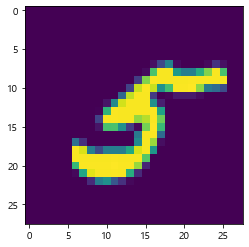

In [100]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28))